In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
import random

np.random.seed(1000)
A = np.random.randn(1000,10)

x_bar  =[]
for i in range(1,11):
  if i%2 == 0:
      x_bar.append(np.random.uniform(i,i+1))

  else:
      x_bar.append(np.random.uniform(-(i+1),-i))

x_bar = np.array(x_bar)

In [ ]:
epsilon = np.random.randn(1000,1)

In [ ]:
y = A @ x_bar + epsilon.flatten()

**1. Let us now introduce the following regularized problem (with λ > 0):
$ minf_λ(x) = \frac{λ}{2}x^T x +12∥Ax − y∥^2_2$
Comment on the significance of the newly added regularizer term $\frac{λ}{2}x^T x$, when compared to problem (1).**


In the regularized problem $f_λ(x) = \frac{λ}{2}x^T x + \frac{1}{2}||Ax − y||^2_2$, the term $\frac{λ}{2}x^T x$ is a regularization term added to the original objective function $\frac{1}{2}||Ax − y||^2_2$. This term is known as the L2 regularization term or the ridge penalty.

The significance of the L2 regularization term lies in its ability to control the complexity of the model and prevent overfitting. When λ > 0, the regularization term penalizes large values of the parameter vector x. This has the effect of encouraging the model to choose simpler models (i.e., models with smaller parameter values) that are less likely to overfit the training data.

In contrast, the original objective function $\frac{1}{2}||Ax − y||^2_2$ in problem (1) does not include any regularization term. Without regularization, the model may be more prone to overfitting, especially when the number of features in the dataset is large relative to the number of observations.

Therefore, the addition of the regularization term $\frac{λ}{2}x^T x$ in problem $f_λ(x)$ serves to balance the trade-off between fitting the training data well and keeping the model simple, leading to potentially better generalization performance on unseen data.

**2. Write Python functions to compute the function value, gradient, and Hessian of $f_λ$**

In [ ]:
import numpy as np

def f(x,lmbda):
    return 0.5 * lmbda * np.dot(x, x) + 0.5 * np.linalg.norm(np.dot(A, x) - y)**2

def grad(x,lmbda):
    return lmbda * x + np.dot(A.T, np.dot(A, x) - y)

def hessian(lmbda):
    return lmbda * np.eye(A.shape[1]) + np.dot(A.T, A)

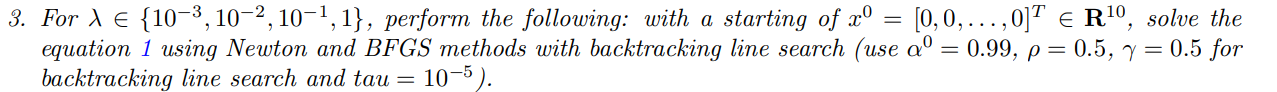

In [ ]:
def dk_f(x,lmbda):
  return np.linalg.inv(hessian(lmbda))

def get_alpha(x, alpha0, rho, gamma,lmbda):
  Dk = dk_f(x,lmbda)
  alpha = alpha0
  pk = -grad(x,lmbda)
  while f(x + alpha*Dk@pk,lmbda) > (f(x,lmbda) + gamma*alpha*grad(x,lmbda)@Dk@pk):
    alpha = rho*alpha
  return alpha

def newton_method_with_backtracking(x0,tol,alpha0, rho, gamma,lmbda):
  x = np.copy(x0)
  count = 0
  pk = grad(x,lmbda)
  xs = []
  xs.append(x)

  while np.linalg.norm(pk)>tol:
    Dk = dk_f(x,lmbda)
    alpha = get_alpha(x, alpha0, rho, gamma,lmbda)
    x = x - alpha * Dk @ pk
    pk = grad(x,lmbda)
    xs.append(x)
    count += 1

  return count, x, f(x,lmbda), xs

----------------------------------------------------------------------------------------
Iterations 5
Minimizer [-1.09611997  2.90211417 -3.37686915  4.54797179 -5.76154123  6.97287222
 -7.64994717  8.16048111 -9.2469895  10.01678564]
Final value 497.36129049254856


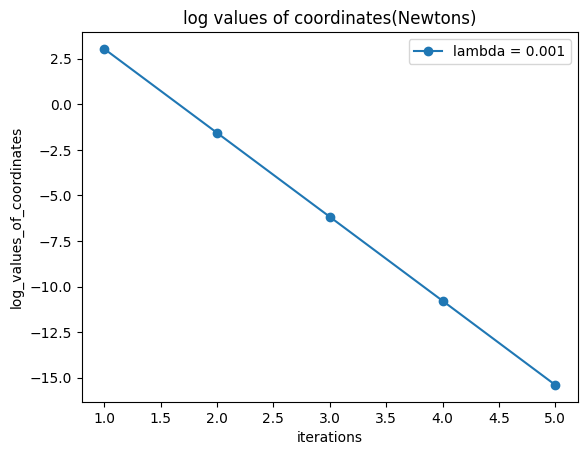

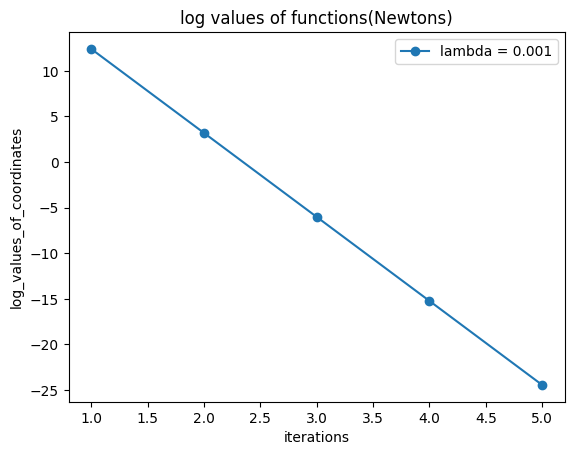

----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
Iterations 5
Minimizer [-1.0961132   2.90209468 -3.37684014  4.54792402 -5.76149789  6.97281512
 -7.64988456  8.16041847 -9.24691744 10.01670555]
Final value 499.3164586382897


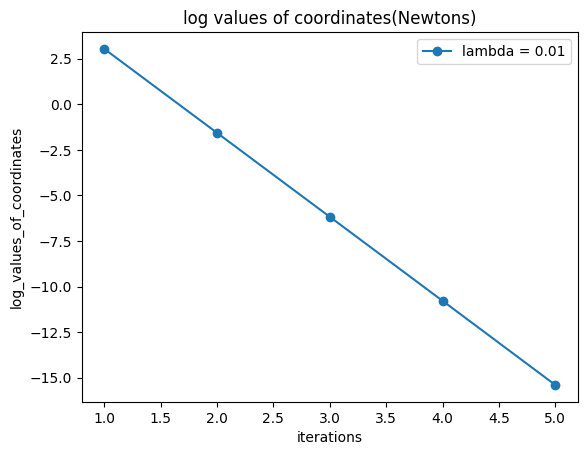

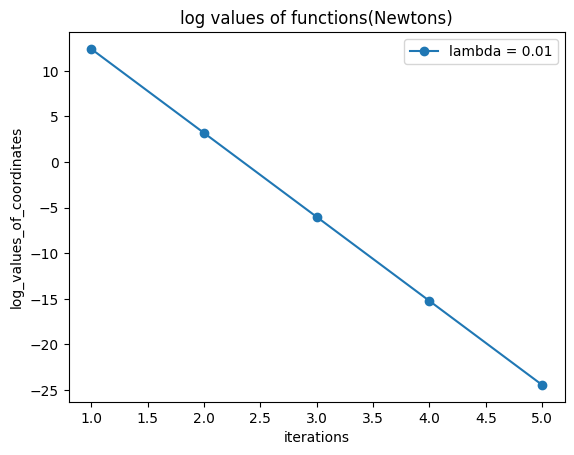

----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
Iterations 5
Minimizer [-1.09604545  2.90189978 -3.37655015  4.54744642 -5.76106451  6.97224419
 -7.64925852  8.15979212 -9.24619691 10.01590476]
Final value 518.866414828366


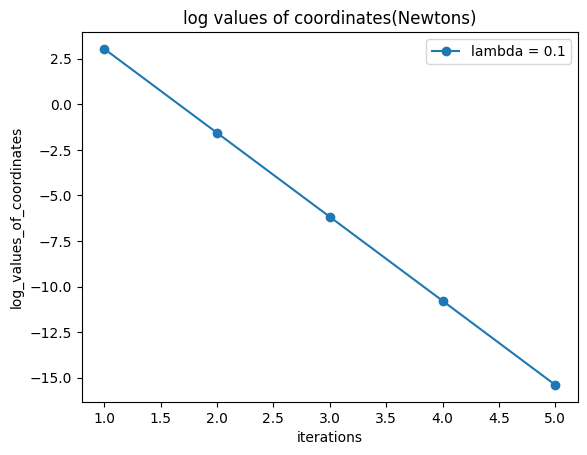

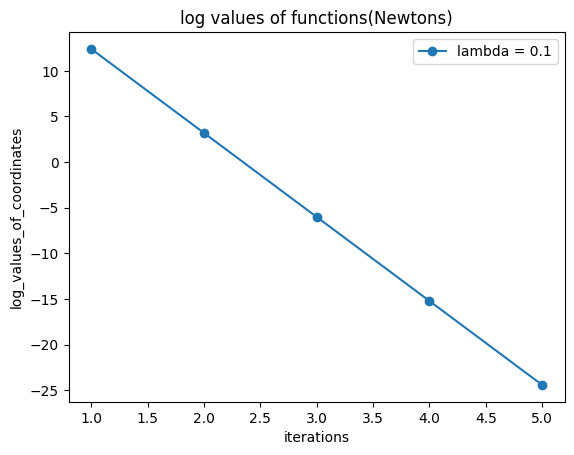

----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
Iterations 5
Minimizer [-1.09536844  2.89995214 -3.37365299  4.54267578 -5.75673419  6.96654
 -7.64300374  8.15353389 -9.23899776 10.007904  ]
Final value 714.1936044447502


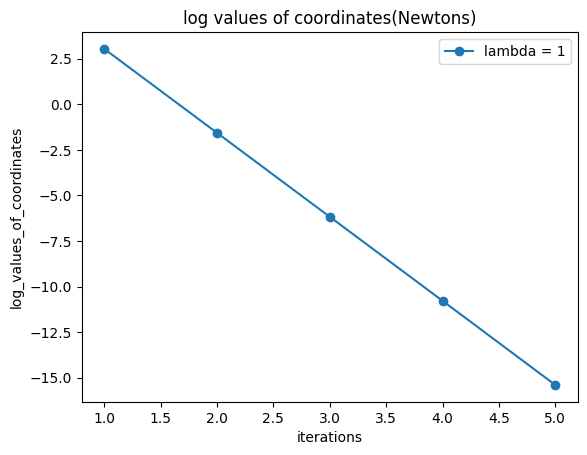

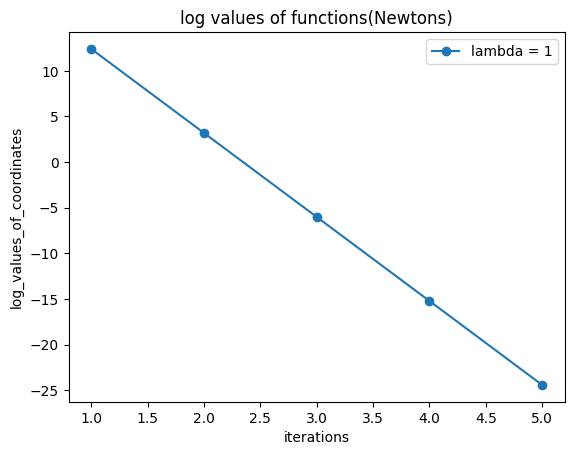

----------------------------------------------------------------------------------------


In [ ]:
lamda = [10**(-3), 10**(-2), 10**(-1), 1]
x0 = np.zeros(10)
alpha0 = 0.99
rho = 0.5
gamma = 0.5
tol = 1e-5
for lmbda in lamda:
      iterations,minimizer,final_value,xks = newton_method_with_backtracking(x0,tol,alpha0,rho, gamma,lmbda)
      print('----------------------------------------------------------------------------------------')
      print('Iterations',iterations)
      print('Minimizer',minimizer)
      print('Final value',final_value)

      logvalues=[]
      for i in range(iterations):
        normt=np.linalg.norm(xks[i]-minimizer)
        logvalues.append(np.log(normt))


      iter=[i+1 for i in range(iterations)]
      plt.plot(iter,logvalues,marker='o',label =f'lambda = {lmbda}')
      plt.title('log values of coordinates(Newtons)')
      plt.xlabel('iterations')
      plt.ylabel('log_values_of_coordinates')
      plt.legend()
      plt.show()


      logvalues=[]
      for i in range(iterations):
        normt=np.linalg.norm(f(xks[i],lmbda)-f(minimizer,lmbda))
        logvalues.append(np.log(normt))
      iter=[i+1 for i in range(iterations)]
      plt.plot(iter,logvalues,marker='o',label =f'lambda = {lmbda}')
      plt.title('log values of functions(Newtons)')
      plt.xlabel('iterations')
      plt.ylabel('log_values_of_coordinates')
      plt.legend()
      plt.show()
      print('----------------------------------------------------------------------------------------')

#OBSERVATION

**Here it is seen that for each of the lamda values, it took 5 iterations to reach the minimum value**

#BFGS

In [ ]:

def get_alpha_bfgs(x, alpha0, rho, gamma, Bk,lmbda):
  alpha = alpha0
  pk = -grad(x,lmbda)
  while f(x + alpha*Bk@pk,lmbda) > (f(x,lmbda) + gamma*alpha*grad(x,lmbda)@Bk@pk):
    alpha = rho*alpha
  return alpha

def bfgs(x0, tol, alpha0, rho, gamma,lmbda,max_iter=500):

  x = np.copy(x0)
  n = len(x0)
  Bk = np.eye(n)
  count = 0
  pk = grad(x,lmbda)
  xs = []
  xs.append(x)
  while (np.linalg.norm(pk)>tol):
    if count > max_iter:
      break

    alpha = get_alpha_bfgs(x, alpha0, rho, gamma, Bk,lmbda)
    xnext = x - alpha*(Bk@pk)
    sk = xnext - x
    yk = grad(xnext,lmbda) - grad(x,lmbda)
    # BFGS
    Bk = np.dot((np.eye(len(x)) - np.outer(sk, yk) / np.dot(yk, sk)), np.dot(Bk, (np.eye(len(x)) - np.outer(yk, sk) / np.dot(yk, sk)))) + np.outer(sk, sk) / np.dot(yk, sk)

    x = xnext
    pk = grad(x,lmbda)
    xs.append(x)
    count += 1


  return count, x, f(x,lmbda), xs








----------------------------------------------------------------------------------------
Iterations 17
Minimizer [-1.09611997  2.90211417 -3.37686915  4.54797179 -5.76154123  6.97287222
 -7.64994718  8.16048111 -9.2469895  10.01678564]
Final value 497.36129049254845


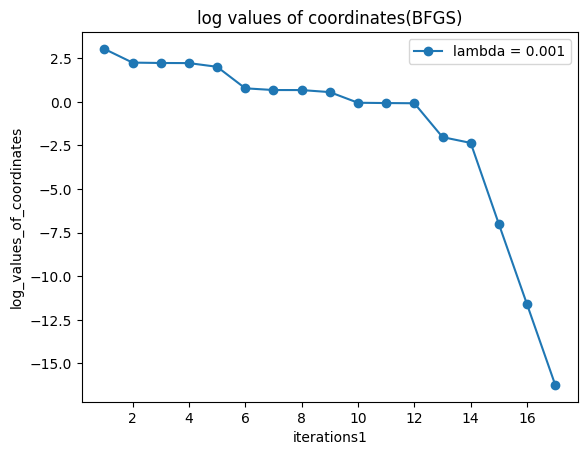

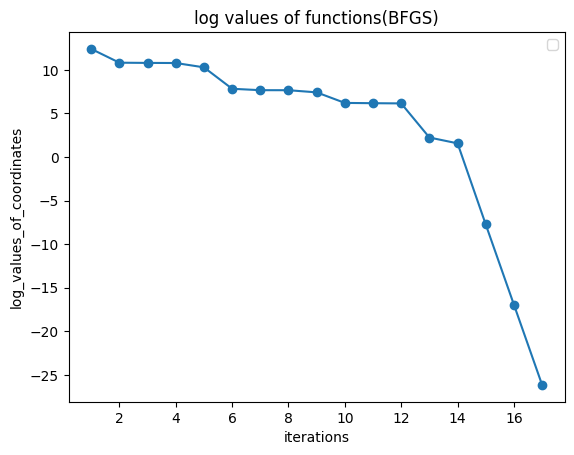

----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
Iterations 20
Minimizer [-1.0961132   2.90209468 -3.37684014  4.54792402 -5.76149789  6.97281512
 -7.64988457  8.16041847 -9.24691744 10.01670555]
Final value 499.31645863828965


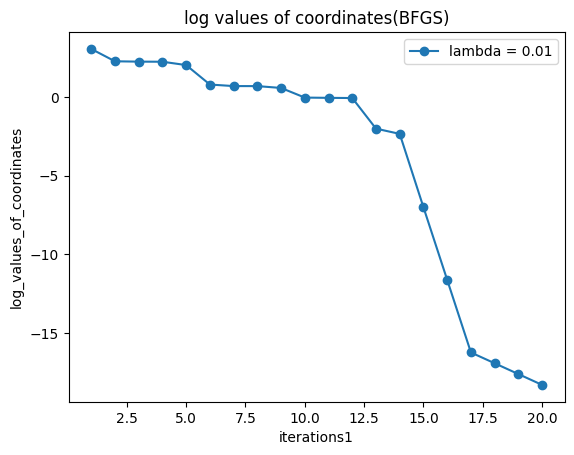

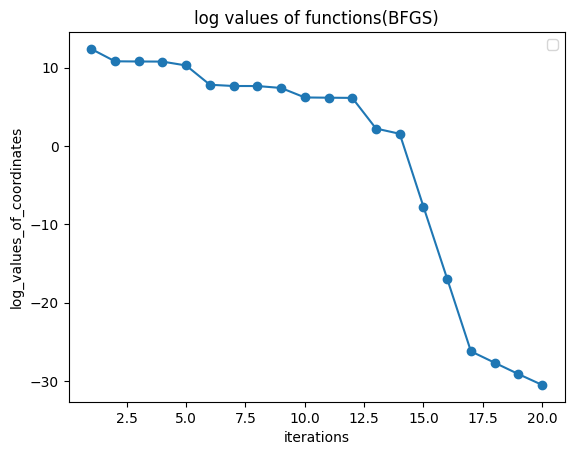

----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
Iterations 17
Minimizer [-1.09604545  2.90189978 -3.37655015  4.54744642 -5.76106451  6.97224419
 -7.64925852  8.15979212 -9.24619691 10.01590476]
Final value 518.8664148283661


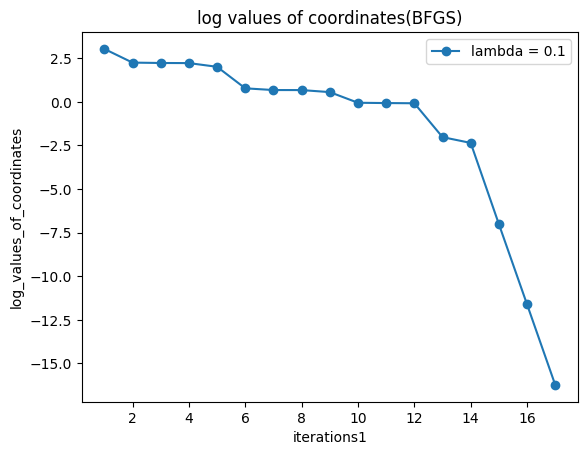

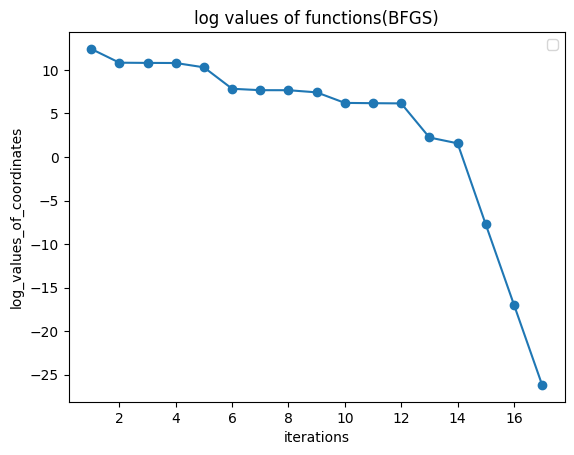

----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
Iterations 17
Minimizer [-1.09536844  2.89995214 -3.37365299  4.54267578 -5.75673419  6.96654
 -7.64300374  8.15353389 -9.23899776 10.007904  ]
Final value 714.1936044447505


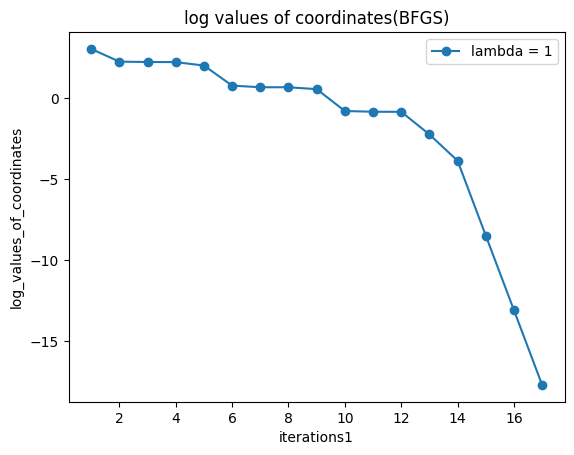

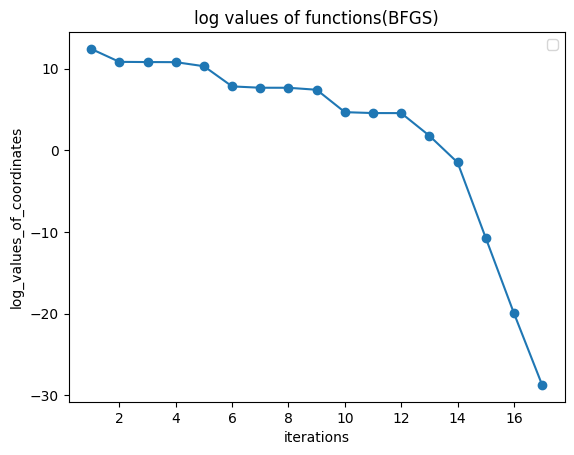

----------------------------------------------------------------------------------------


In [ ]:
lamda = [10**(-3), 10**(-2), 10**(-1), 1]
x0 = np.zeros(10)
alpha0 = 0.99
rho = 0.5
gamma = 0.5
tol = 1e-5

# Solve the problem
for lmbda in lamda:
      iterations1,minimizer1,final_value1,xks1 = bfgs(x0, tol, alpha0, rho, gamma,lmbda, max_iter=500)
      print('----------------------------------------------------------------------------------------')
      print('Iterations',iterations1)
      print('Minimizer',minimizer1)
      print('Final value',final_value1)

      logvalues=[]
      for i in range(iterations1):
        norm=np.linalg.norm(xks1[i]-minimizer1)
        logvalues.append(np.log(norm))
      iter=[i+1 for i in range(iterations1)]
      plt.plot(iter,logvalues,marker='o',label =f'lambda = {lmbda}')
      plt.title('log values of coordinates(BFGS)')
      plt.xlabel('iterations1')
      plt.ylabel('log_values_of_coordinates')
      plt.legend()
      plt.show()

      logvalues=[]
      for i in range(iterations1):
        norm=np.linalg.norm(f(xks1[i],lmbda)-f(minimizer1,lmbda))
        logvalues.append(np.log(norm))
      iter=[i+1 for i in range(iterations1)]
      plt.plot(iter,logvalues,marker='o')
      plt.title('log values of functions(BFGS)')
      plt.xlabel('iterations')
      plt.ylabel('log_values_of_coordinates')
      plt.legend()
      plt.show()
      print('----------------------------------------------------------------------------------------')

#Observation
**Here only for the lamda value 0.01, it took 20 iterations where for the other values, it took 17 iterations to reach the minimum value**

Here for **lambda 0.01**, the function value started dropping linearly from iteration 14 and again another change was seen after iteration 16 and **for other lamda values** the function started dropping linearly from iteration 14

**6. Compare and contrast the results obtained by Newton’s method and BFGS method and comment on the time
taken by both methods for each value of λ.**


Here it was seen that the newtons method is more efficient than bfgs method for quadratic functions